In [88]:
import numpy as np
import pandas as pd
df1=pd.read_csv("data_se_all.csv")
df1.head()

,start_city_id,is_cross_city_flag,is_station_flag,consult_hour,byway_degree,final_rank,travel_to_call,answer_to_call,travel_to_answer,is_td_cancel_aft_flag,...,gender_p_F,gender_d_F,is_auto_deal_闪电确认,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,84,1,0,12,90,0.0,0.801667,0.413611,0.388056,1,...,0,0,0,0,0,0,0,1,0,0
1,6,1,0,8,95,0.0,9.384722,8.913333,0.471389,1,...,1,0,1,0,0,0,0,0,0,1
2,6,0,0,11,95,0.0,0.401111,0.337778,0.063333,0,...,1,0,1,0,1,0,0,0,0,0
3,5,0,0,7,90,0.0,10.689167,0.030833,10.658333,0,...,1,0,1,1,0,0,0,0,0,0
4,92,0,0,16,90,0.0,0.394722,0.093889,0.300833,0,...,1,0,0,0,0,0,1,0,0,0


In [89]:
df1

,start_city_id,is_cross_city_flag,is_station_flag,consult_hour,byway_degree,final_rank,travel_to_call,answer_to_call,travel_to_answer,is_td_cancel_aft_flag,...,gender_p_F,gender_d_F,is_auto_deal_闪电确认,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,84,1,0,12,90,0.0,0.801667,0.413611,0.388056,1,...,0,0,0,0,0,0,0,1,0,0
1,6,1,0,8,95,0.0,9.384722,8.913333,0.471389,1,...,1,0,1,0,0,0,0,0,0,1
2,6,0,0,11,95,0.0,0.401111,0.337778,0.063333,0,...,1,0,1,0,1,0,0,0,0,0
3,5,0,0,7,90,0.0,10.689167,0.030833,10.658333,0,...,1,0,1,1,0,0,0,0,0,0
4,92,0,0,16,90,0.0,0.394722,0.093889,0.300833,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,153,0,0,8,80,0.0,10.401111,0.009167,10.391944,0,...,0,0,1,0,0,1,0,0,0,0
499996,15,0,0,18,95,0.0,1.789167,0.794167,0.995000,1,...,1,0,0,0,0,0,0,1,0,0
499997,36,0,0,6,85,0.0,10.203056,0.134444,10.068611,0,...,0,0,1,1,0,0,0,0,0,0
499998,8,0,0,16,95,0.0,0.297222,0.055556,0.241667,0,...,0,0,0,0,0,1,0,0,0,0


In [59]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import pandas as pd
import os
import seaborn as sea
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,ShuffleSplit,StratifiedKFold,KFold
import numpy as np
import pandas as pd
import os
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from xgboost import plot_importance
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,ShuffleSplit,StratifiedKFold,KFold
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import joblib
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
#from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score



# 数据

In [97]:
#df1.isnull().sum()  #只有车主顺路程度有缺失，其结果为01离散分布，对确实值填充
df1=df1.fillna(0)
Y = df1['is_td_cancel_aft_flag']
X =df1.drop(['is_td_cancel_aft_flag'],axis=1,inplace=False)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
    #X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape
#区分闪电确认

df_y=df1[df1["is_auto_deal_闪电确认"]==1]
df_n=df1[df1["is_auto_deal_闪电确认"]==0]
Y1 = df_y['is_td_cancel_aft_flag']
#,"is_auto_deal_闪电确认"
X1 =df_y.drop(['is_td_cancel_aft_flag'],axis=1,inplace=False)
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size=0.3,random_state=0)
    #X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape
Y2 = df_n['is_td_cancel_aft_flag']
X2 =df_n.drop(['is_td_cancel_aft_flag'],axis=1,inplace=False)
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,Y2,test_size=0.3,random_state=0)
X2_train.head()

,start_city_id,is_cross_city_flag,is_station_flag,consult_hour,byway_degree,final_rank,travel_to_call,answer_to_call,travel_to_answer,is_carp_flag,...,gender_p_F,gender_d_F,is_auto_deal_闪电确认,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
140361,173,1,0,22,85,0.0,1.202222,0.348333,0.853889,1,...,0,0,0,1,0,0,0,0,0,0
283037,17,0,0,22,60,0.0,0.747500,0.114167,0.633333,1,...,0,0,0,0,0,0,0,0,0,1
345993,35,0,0,18,95,0.0,0.562778,0.008333,0.554444,1,...,1,0,0,0,0,1,0,0,0,0
230348,8,0,0,15,75,0.0,0.401944,0.067778,0.334167,1,...,0,0,0,0,0,0,1,0,0,0
479630,160,0,0,14,95,0.0,0.498056,0.014167,0.483889,1,...,1,0,0,0,0,0,0,0,1,0


In [93]:
X

,start_city_id,is_cross_city_flag,is_station_flag,consult_hour,byway_degree,final_rank,travel_to_call,answer_to_call,travel_to_answer,is_carp_flag,...,gender_p_F,gender_d_F,is_auto_deal_闪电确认,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,84,1,0,12,90,0.0,0.801667,0.413611,0.388056,1,...,0,0,0,0,0,0,0,1,0,0
1,6,1,0,8,95,0.0,9.384722,8.913333,0.471389,1,...,1,0,1,0,0,0,0,0,0,1
2,6,0,0,11,95,0.0,0.401111,0.337778,0.063333,1,...,1,0,1,0,1,0,0,0,0,0
3,5,0,0,7,90,0.0,10.689167,0.030833,10.658333,0,...,1,0,1,1,0,0,0,0,0,0
4,92,0,0,16,90,0.0,0.394722,0.093889,0.300833,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,153,0,0,8,80,0.0,10.401111,0.009167,10.391944,1,...,0,0,1,0,0,1,0,0,0,0
499996,15,0,0,18,95,0.0,1.789167,0.794167,0.995000,1,...,1,0,0,0,0,0,0,1,0,0
499997,36,0,0,6,85,0.0,10.203056,0.134444,10.068611,1,...,0,0,1,1,0,0,0,0,0,0
499998,8,0,0,16,95,0.0,0.297222,0.055556,0.241667,0,...,0,0,0,0,0,1,0,0,0,0


[Text(334.8, 440.31600000000003, 'petal length (cm) <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(251.10000000000002, 342.468, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(418.5, 342.468, 'petal length (cm) <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(167.4, 244.62, 'petal width (cm) <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(83.7, 146.772, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(251.10000000000002, 146.772, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(167.4, 48.924000000000035, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(334.8, 48.924000000000035, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(669.6, 244.62, 'petal width (cm) <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica

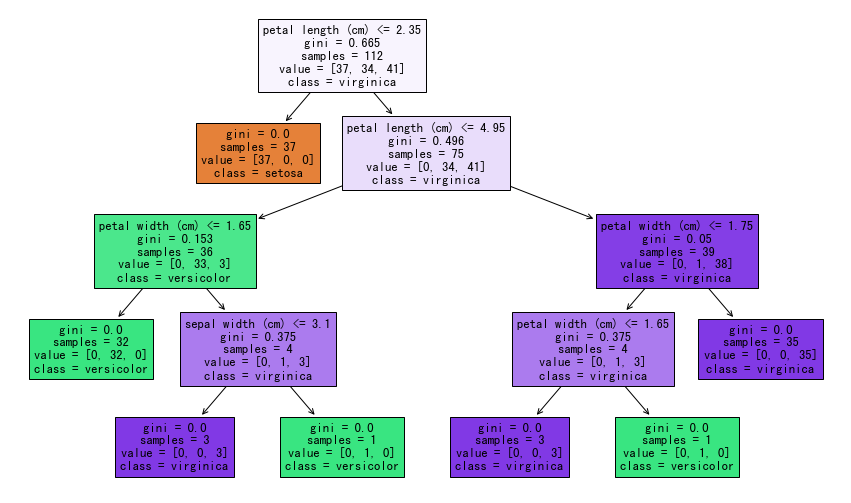

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
 
iris = load_iris()
 
# 数据拆分
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0, test_size=1/4)
 
# 训练模型
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train, y_train)
 
# 数据可视化
plt.figure(figsize=(15,9))
plot_tree(dt_model,filled=True,feature_names=iris.feature_names, class_names=iris.target_names)

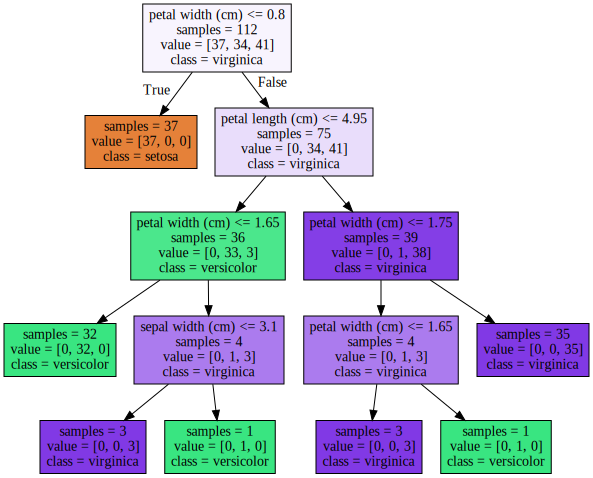

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import graphviz
 
iris = load_iris()
 
# 数据拆分
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0, test_size=1/4)
 
# 训练模型
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train, y_train)
 
# 数据可视化
tmp_dot_file = 'decision_tree_tmp.dot'
export_graphviz(dt_model, out_file=tmp_dot_file, feature_names=iris.feature_names, class_names=iris.target_names,filled=True, impurity=False)
with open(tmp_dot_file) as f:
        dot_graph = f.read()
fig=graphviz.Source(dot_graph)
fig

In [61]:
#dot -Tpng decision_tree_tmp.dot -o tree.png

# graphviz

In [210]:
#决策树
from sklearn.tree import DecisionTreeClassifier,plot_tree#决策树
def dct(X_train, y_train,X_test, y_test):
    #X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape
    dct = DecisionTreeClassifier(random_state=123,max_depth=5,min_samples_leaf=12)
    dct.fit(X_train.values, y_train.values)
    # predicted proability
    train_pred = dct.predict_proba(X_train)[:,1]
    test_pred = dct.predict_proba(X_test)[:,1]
    # 预测结果
    y_train_pred = dct.predict(X_train) 
    y_test_pred = dct.predict(X_test)

    # MSE 均方误差
    print('准确率:',dct.score(X_test, y_test)) # 全体
    print('ACC: %.4f' % metrics.accuracy_score(y_test,y_test_pred)) 

    fpr,tpr,threshold=metrics.roc_curve(y_test,test_pred)
    rocauc=metrics.auc(fpr,tpr)   #AUC，AUC>0.7，表示可接受的区辨能力
    print("AUC:",rocauc)
    print("KS:",max(tpr-fpr))  # KS值，KS>0.3，表示可接受的区辨能力
  
    print(confusion_matrix(y_test,y_test_pred))
    print(confusion_matrix(y_train,y_train_pred))

    # 每个系数的影响力，系数越大表示特征在分类中起到的作用越大
    importance = pd.DataFrame({'features':X_train.columns,'importance':dct.feature_importances_}) 
    return importance.sort_values(['importance'],ascending=False).reset_index(drop=True)


In [211]:
dct(X_train, y_train,X_test, y_test)

准确率: 0.7529466666666667
ACC: 0.7529
AUC: 0.6595530585175247
KS: 0.22234929200071585
[[110171   2145]
 [ 34913   2771]]
[[257703   5024]
 [ 80616   6657]]


,features,importance
0,dri_cancel_rate,0.398248
1,pas_finish_ord_cnt,0.161328
2,pas_cancel_rate,0.152029
3,answer_to_call,0.109732
4,navi_dis_km_route,0.078896
5,is_auto_deal_闪电确认,0.041887
6,travel_to_call,0.036260
7,is_td_answer_carp_flag,0.021621
8,consult_hour_type_晚高峰(17:00-18:59),0.000000
9,d_blame_canel_rate,0.000000


In [227]:
decision_tree = DecisionTreeClassifier(random_state=123,max_depth=5,min_samples_leaf=12)
decision_tree.fit(X, Y)
col=list(X_train.columns)
# 数据可视化
tmp_dot_file = 'decision_tree_tmp.dot'
export_graphviz(decision_tree, out_file=tmp_dot_file, feature_names=col, class_names=["1","0"],filled=True, impurity=False)


In [228]:
with open(tmp_dot_file) as f:
        dot_graph = f.read()
graph=graphviz.Source(dot_graph)
#dot -Tpng decision_tree_tmp.dot -o tree.png
graph.render(view=True,format="pdf",filename="dec_tree")

'dec_tree.pdf'

# 特征规则输出

In [67]:
#将特征规则进行输出
def Get_Rules(clf,X):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    value = clf.tree_.value


    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves  = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]


    while len(stack) > 0:


        node_id, depth = stack.pop()
        node_depth[node_id] = depth


        is_split_node = children_left[node_id] != children_right[node_id]


        if is_split_node:
            stack.append((children_left[node_id],  depth+1))
            stack.append((children_right[node_id], depth+1))
        else:
            is_leaves[node_id] = True  
    feature_name = [
            X.columns[i] for i in clf.tree_.feature]


    ways  = []
    depth = []
    feat = []
    nodes = []
    rules = []
    for i in range(n_nodes):   
        if  is_leaves[i]: 
            while depth[-1] >= node_depth[i]:
                depth.pop()
                ways.pop()    
                feat.pop()
                nodes.pop()
            if children_left[i-1]==i:#当前节点是上一个节点的左节点，则是小于
                a='{f}<={th}'.format(f=feat[-1],th=round(threshold[nodes[-1]],4))
                ways[-1]=a              
                last =' & '.join(ways)+':'+str(value[i][0][0])+':'+str(value[i][0][1])
                rules.append(last)
            else:
                a='{f}>{th}'.format(f=feat[-1],th=round(threshold[nodes[-1]],4))
                ways[-1]=a
                last = ' & '.join(ways)+':'+str(value[i][0][0])+':'+str(value[i][0][1])
                rules.append(last)


        else: #不是叶子节点 入栈
            if i==0:
                ways.append(round(threshold[i],4))
                depth.append(node_depth[i])
                feat.append(feature_name[i])
                nodes.append(i)             
            else: 
                while depth[-1] >= node_depth[i]:
                    depth.pop()                    
                    ways.pop()
                    feat.pop()                    
                    nodes.pop()
                if i==children_left[nodes[-1]]:
                    w='{f}<={th}'.format(f=feat[-1],th=round(threshold[nodes[-1]],4))
                else:
                    w='{f}>{th}'.format(f=feat[-1],th=round(threshold[nodes[-1]],4))              
                ways[-1] = w  
                ways.append(round(threshold[i],4))
                depth.append(node_depth[i]) 
                feat.append(feature_name[i])
                nodes.append(i)
    return rules

In [104]:
#训练一个决策树，对规则进行提取
#clf = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=50)
#clf = clf.fit(X, Y)
#decision_tree.fit(X_train, y_train)
Rules = Get_Rules(decision_tree,X)
Rules[0:5] # 查看前5条规则

['dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=5.5 & answer_to_call<=9.4479 & travel_to_call<=0.4804 & answer_to_call<=0.1496:31079.0:7209.0',
 'dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=5.5 & answer_to_call<=9.4479 & travel_to_call<=0.4804 & answer_to_call>0.1496:3290.0:1233.0',
 'dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=5.5 & answer_to_call<=9.4479 & travel_to_call>0.4804 & is_auto_deal_闪电确认<=0.5:18834.0:4969.0',
 'dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=5.5 & answer_to_call<=9.4479 & travel_to_call>0.4804 & is_auto_deal_闪电确认>0.5:63033.0:26654.0',
 'dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=5.5 & answer_to_call>9.4479 & is_auto_deal_闪电确认<=0.5 & travel_to_answer<=0.7957:312.0:48.0']

In [172]:
al=[]
bl=[]
cl=[]
for i in Rules:
    a,b,c=i.split(":")
    al.append(a)
    bl.append(b)
    cl.append(c)
a1=pd.DataFrame(al)
b1=pd.DataFrame(bl)
c1=pd.DataFrame(cl)
ru=pd.concat([a1,b1,c1],axis=1)
ru.columns=["relues","suc","fail"]
#re.to_csv("relues.csv",encoding='utf_8_sig')

In [184]:
re1=ru
re1.head()
#re1["suc"]=re1["suc"].apply(lambda x:eval(x))
#re1["fail"]=re1["fail"].apply(lambda x:eval(x))
re1["取消率"]=re1["fail"]/(re1["suc"]+re1["fail"])
re1.head()

,relues,suc,fail,取消率
0,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,31079.0,7209.0,0.188284
1,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,3290.0,1233.0,0.272607
2,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,18834.0,4969.0,0.208755
3,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,63033.0,26654.0,0.297189
4,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,312.0,48.0,0.133333


## 闪电确认

In [189]:
#闪电确认在各规则下的取消分布 is_auto_deal_闪电确认  is_td_cancel_aft_flag
suc=[]
fail=[]
for a in re1["relues"]:#第一行 
    l=a.split("&") #行特征规则
    f=df1[df1["is_auto_deal_闪电确认"]==1]
    for b in l:#行特征规则
        li=re.split('>|<',b)
        id=li[0].strip()
        da=li[1].replace('=','')
        if id=="is_auto_deal_闪电确认":
            continue
        else:
            if "<=" in b:
                f=f[f[id]<=eval(da)]
            elif  ">=" in b:
                f=f[f[id]>=eval(da)]
            elif ">" in b:
                f=f[f[id]>eval(da)]
            elif "<" in b:
                f=f[f[id]<eval(da)]
    suc.append(f[f["is_td_cancel_aft_flag"]==0].shape[0])
    fail.append(f[f["is_td_cancel_aft_flag"]==1].shape[0])
s=pd.concat([pd.DataFrame(suc),pd.DataFrame(fail)],axis=1)
s.columns=["suc","fail"]
s["取消率"]=s["fail"]/(s["suc"]+s["fail"])
s

,suc,fail,取消率
0,24806,6092,0.197165
1,2411,1066,0.306586
2,63033,26655,0.297197
3,63033,26655,0.297197
4,809,996,0.551801
5,3636,3307,0.476307
6,3861,3294,0.460377
7,584,1009,0.633396
8,39717,4407,0.099878
9,29919,5199,0.148044


## 非闪电确认 

In [190]:
#闪电确认在各规则下的取消分布 is_auto_deal_闪电确认  is_td_cancel_aft_flag
def ru_app():
    suc=[]
    fail=[]
    for a in re1["relues"]:#第一行 
        l=a.split("&") #行特征规则
        f=df1[df1["is_auto_deal_闪电确认"]==0]
        for b in l:#行特征规则
            li=re.split('>|<',b)
            id=li[0].strip()
            da=li[1].replace('=','')
            if id=="is_auto_deal_闪电确认":
                continue
            else:
                if "<=" in b:
                    f=f[f[id]<=eval(da)]
                elif  ">=" in b:
                    f=f[f[id]>=eval(da)]
                elif ">" in b:
                    f=f[f[id]>eval(da)]
                elif "<" in b:
                    f=f[f[id]<eval(da)]
        suc.append(f[f["is_td_cancel_aft_flag"]==0].shape[0])
        fail.append(f[f["is_td_cancel_aft_flag"]==1].shape[0])
    s=pd.concat([pd.DataFrame(suc),pd.DataFrame(fail)],axis=1)
    s.columns=["suc","fail"]
    s["取消率"]=s["fail"]/(s["suc"]+s["fail"])
    return s

In [191]:
s1=ru_app()

## 总体合并

In [206]:
#da_s.to_csv("relues_sum.csv",encoding='utf_8_sig')

In [198]:
da_s=pd.concat([re1,s,s1],axis=1)
da_s.columns=['relues', 'suc', 'fail', '取消率', 'suc_1', 'fail_1', '取消率_1', 'suc_0', 'fail_0','取消率_0']
da_s["取消率差"]=da_s["取消率_1"]-da_s["取消率_0"]
da_s
#da_s.to_csv("relues.csv",encoding='utf_8_sig')

,relues,suc,fail,取消率,suc_1,fail_1,取消率_1,suc_0,fail_0,取消率_0,取消率差
0,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,31079.0,7209.0,0.188284,24806,6092,0.197165,6273,1118,0.151265,0.045900
1,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,3290.0,1233.0,0.272607,2411,1066,0.306586,879,167,0.159656,0.146930
2,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,18834.0,4969.0,0.208755,63033,26655,0.297197,18834,4969,0.208755,0.088442
3,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,63033.0,26654.0,0.297189,63033,26655,0.297197,18834,4969,0.208755,0.088442
4,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,312.0,48.0,0.133333,809,996,0.551801,312,48,0.133333,0.418467
5,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,1319.0,499.0,0.274477,3636,3307,0.476307,1319,499,0.274477,0.201830
6,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,3861.0,3294.0,0.460377,3861,3294,0.460377,1352,406,0.230944,0.229433
7,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,584.0,1009.0,0.633396,584,1009,0.633396,279,141,0.335714,0.297682
8,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt>5...,48627.0,5107.0,0.095042,39717,4407,0.099878,8918,701,0.072877,0.027001
9,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt>5...,35167.0,5864.0,0.142916,29919,5199,0.148044,5258,671,0.113173,0.034871


In [203]:
#显著性检验
from statsmodels.stats.proportion import proportions_ztest as ztest
import numpy as np
p=[]
for i  in range(da_s.shape[0]):
    a1=da_s["取消率_1"][i]
    a0=da_s["取消率_0"][i]
    s1=da_s["suc_1"][i]+da_s["fail_1"][i]
    s0=da_s["suc_0"][i]+da_s["fail_0"][i]
    z=ztest(count=np.array([a1,a0]), nobs=np.array([s1,s0]))
    p.append(round(z[1],4))
#原文链接：https://blog.csdn.net/weixin_41744624/article/details/109841731
p

[0.7184,
 0.8571,
 0.723,
 0.723,
 0.9498,
 0.7355,
 0.775,
 0.7385,
 0.7923,
 0.6746,
 0.798,
 0.7649,
 0.6264,
 0.6421,
 0.5696,
 0.661,
 0.8151,
 0.7788,
 0.8474,
 0.6863,
 0.816,
 0.7708,
 0.6943,
 0.6943,
 0.7231,
 0.6649,
 0.723,
 0.639,
 0.8094,
 0.7159,
 0.7787,
 0.7547]

In [205]:
#da_s["p值"]=p
da_s["显著性"]="不显著"
da_s

,relues,suc,fail,取消率,suc_1,fail_1,取消率_1,suc_0,fail_0,取消率_0,取消率差,p值,显著性
0,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,31079.0,7209.0,0.188284,24806,6092,0.197165,6273,1118,0.151265,0.045900,0.7184,不显著
1,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,3290.0,1233.0,0.272607,2411,1066,0.306586,879,167,0.159656,0.146930,0.8571,不显著
2,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,18834.0,4969.0,0.208755,63033,26655,0.297197,18834,4969,0.208755,0.088442,0.7230,不显著
3,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,63033.0,26654.0,0.297189,63033,26655,0.297197,18834,4969,0.208755,0.088442,0.7230,不显著
4,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,312.0,48.0,0.133333,809,996,0.551801,312,48,0.133333,0.418467,0.9498,不显著
5,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,1319.0,499.0,0.274477,3636,3307,0.476307,1319,499,0.274477,0.201830,0.7355,不显著
6,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,3861.0,3294.0,0.460377,3861,3294,0.460377,1352,406,0.230944,0.229433,0.7750,不显著
7,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt<=...,584.0,1009.0,0.633396,584,1009,0.633396,279,141,0.335714,0.297682,0.7385,不显著
8,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt>5...,48627.0,5107.0,0.095042,39717,4407,0.099878,8918,701,0.072877,0.027001,0.7923,不显著
9,dri_cancel_rate<=0.3157 & pas_finish_ord_cnt>5...,35167.0,5864.0,0.142916,29919,5199,0.148044,5258,671,0.113173,0.034871,0.6746,不显著


### 无题

In [112]:
import re
re.split('<=|>=',re1["relues"][1])
re1["relues"][0].split("&")
#######测试规则
#第1行的第一个规则
#re.split('>|<',re1["relues"][0].split("&")[0])
#df_y[df_y["is_td_cancel_aft_flag"]==0].shape[0]
f=df1[df1["is_auto_deal_闪电确认"]==1]
b=re1["relues"][0].split("&")[1]
re.split('>|<',b)
id=re.split('>|<',b)[0].strip()
da=eval(re.split('>|<',b)[1].replace('=',''))
f[id]
f[f[id]<=da]

['dri_cancel_rate',
 '0.3157 & pas_finish_ord_cnt',
 '5.5 & answer_to_call',
 '9.4479 & travel_to_call',
 '0.4804 & answer_to_call>0.1496']

# plot_tree

In [224]:
#决策树
from sklearn.tree import DecisionTreeClassifier,plot_tree#决策树
def tree(X_train, Y_train,X_test, Y_test):
    decision_tree = DecisionTreeClassifier(random_state=123,max_depth=5,min_samples_leaf=12)
    decision_tree.fit(X_train, Y_train)
    # Y_pred = decision_tree.predict(X_test)#测试集预测
    acc_decision_tree_train = round(decision_tree.score(X_train, Y_train) * 100, 2)#训练集上的评分
    acc_decision_tree_test = round(decision_tree.score(X_test, Y_test) * 100, 2)#测试集上的评分
    print(acc_decision_tree_train,acc_decision_tree_test)
    print(cross_val_score(decision_tree, X_train, y=Y_train, scoring=None, cv=5).mean())
    col=list(X_train.columns)
    plt.figure(figsize=(20,16))
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['simhei'] 
    plt.rcParams['axes.unicode_minus'] = False
    plot_tree(decision_tree,fontsize=10,filled=True,feature_names=col) #打印决策树的结构图
    return plt.show()

75.53 75.29
0.7549571428571429


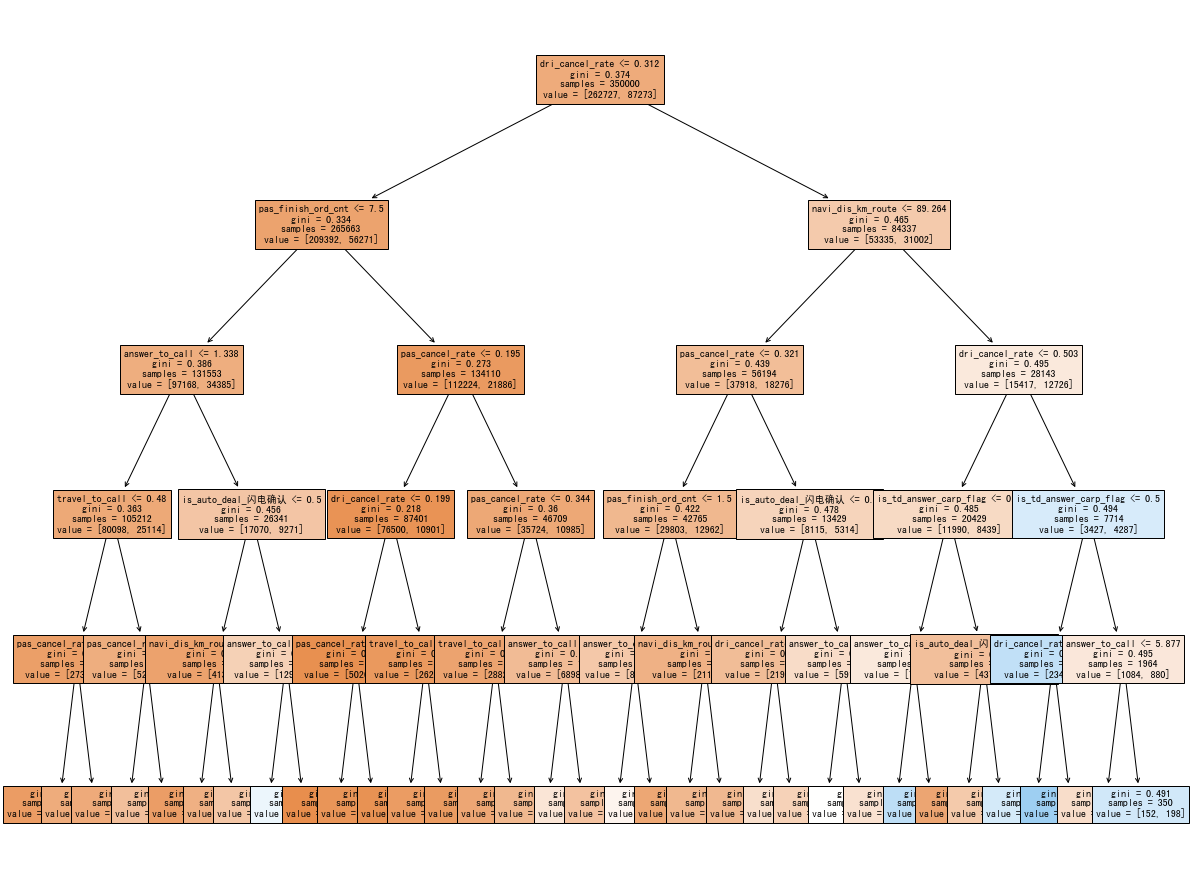

In [225]:
 tree(X_train, y_train,X_test, y_test)

In [ ]:
tree(X1_train, y1_train,X1_test, y1_test)

74.65 74.57
0.7420866797952922


In [ ]:
tree(X2_train, y2_train,X2_test, y2_test)

# dtreeviz

In [212]:
 !pip install --trusted-host didiyum.sys.xiaojukeji.com -i http://didiyum.sys.xiaojukeji.com/didiyum/pip/simple/ dtreeviz

E0526 18:02:13.992463075 1378451 backup_poller.cc:133]       Run client channel backup poller: {"created":"@1653559333.992307925","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":321,"referenced_errors":[{"created":"@1653559333.992301395","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":957,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}
E0526 18:02:18.992444954 1378455 backup_poller.cc:133]       Run client channel backup poller: {"created":"@1653559338.992402805","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":321,"referenced_errors":[{"created":"@1653559338.992399833","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":957,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}
E0526 18:02:23.993258340 1378451 backup_poller.cc:133]       Run client channel backup poller: {"created

In [215]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
from sklearn.tree import DecisionTreeClassifier,plot_tree#决策树

In [214]:
classifier = DecisionTreeClassifier(max_depth=2)  # limit depth of tree
iris = load_iris()
classifier.fit(iris.data, iris.target)

viz = dtreeviz(classifier, 
               iris.data, 
               iris.target,
               target_name='variety',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
              )  
              
viz.view() 


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
